In [1]:
from marcap import marcap_data

In [94]:
df = marcap_data('2018-02-01', '2018-08-30', code='005930')

In [95]:
latest_stocks = df.iloc[-1]['Stocks'] # 범위 마지막날 주식수(기준)
df['Adj_Close'] = df['Close'] * (df['Stocks'] / latest_stocks)

In [96]:
from matplotlib import pyplot as plt

In [97]:
budget = 10000000
stockCount = 0
minPrice = 0
tempMinPrice = 0
downContinue = False
upContinue = False

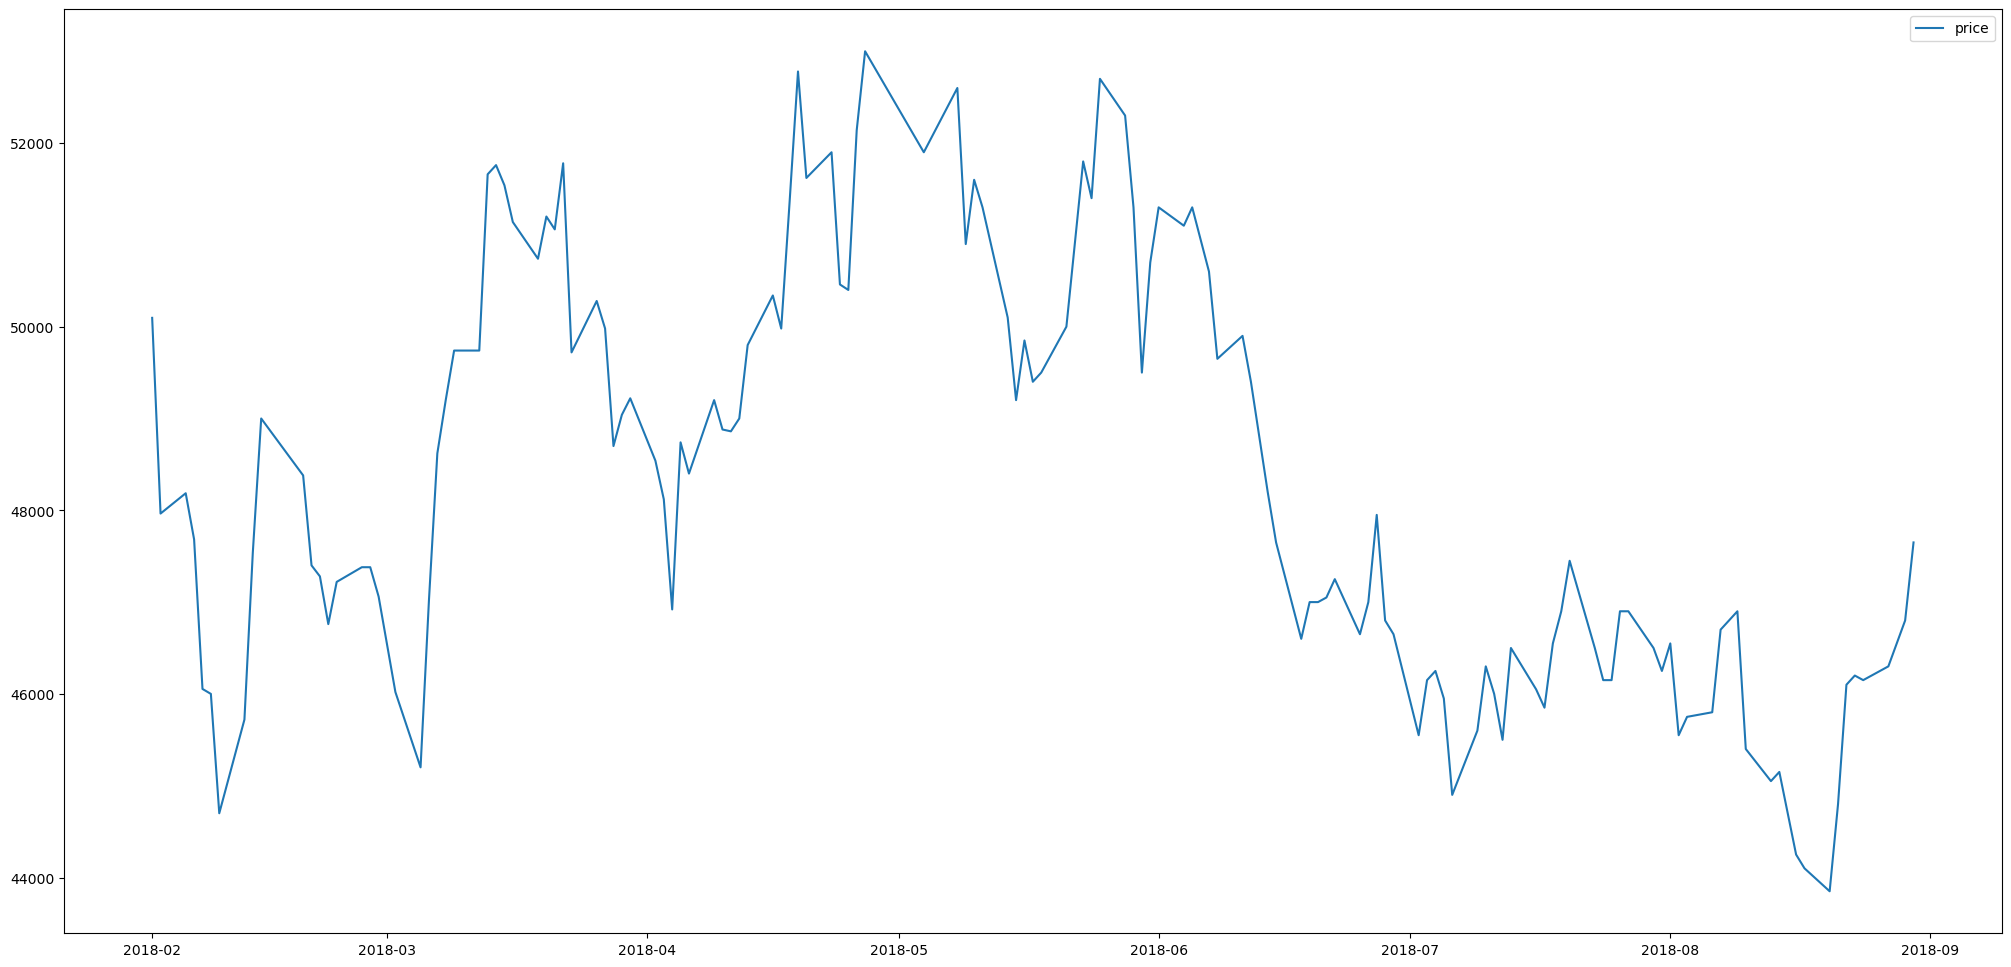

In [98]:
plt.figure(figsize=(25,12))
plt.plot(df['Adj_Close'], label='price')
plt.legend()

In [259]:
prices = df['Adj_Close'].tolist()

In [217]:
budget = 10000000
stockCount = 0
minPrice = 0
tempMinPrice = 0
downContinue = False
upContinue = False
start_budget = budget
interval = 1
is_buy_signal = False
minPrice = None
stop_loss = 2
stop_profit = 5
daysProfit = []
temp_Buy_Price = 0
temp_last_Price = 0
temp_Index = 0
sellCount = 0
buyCount = 0
keepCount = 0
totalList = []

# for i in range(len(price)):
for i in range(0,125):
    #print("남은 예산:" f'{budget}')
    #print("주식 계좌:" f'{stockCount*price[i]}')
    if budget > 0:
        if minPrice is None:
            minPrices = price[i]

        #저점끼리 비교
        """
        if i-interval >= 0 and (price[i] - price[i-interval]) / interval < 0:
            tempMinPrice = price[i]

            if minPrice > tempMinPrice:
                minPrice = tempMinPrice

            is_change = True
        """
        grad = i-interval >= 0 and (price[i] - price[i-interval]) / interval
        if grad != 0:

            if grad > 0:
                is_buy_signal = True
                minPrice = None
            else:
                is_buy_signal = False

            if minPrice:
                minPrice = price[i]

        #is_buy_signal = False
        #print(is_buy_signal, stockCount)
        if is_buy_signal and budget > price[i]:
            totalList.append(("buy", int(budget / price[i])))
            stockCount += int(budget / price[i])
            budget -= stockCount * price[i]
            #daysProfit.append(0)
            #temp_Buy_Price = price[i]
            
        elif int((price[i] - price[i-1])/price[i-1]*100) <= -stop_loss or int((price[i] - price[i-1])/price[i-1]*100) >= stop_profit:
            #daysProfit.append(((budget + temp_Buy_Price*stockCount) - (budget + price[i]*stockCount))/(budget + price[i]*stockCount)*100)
            budget += price[i]*stockCount
            totalList.append(("sell", stockCount))
            stockCount = 0
            temp_last_Price = price[i]
            temp_Index = i
            sellCount += 1 
            
        else:
            daysProfit.append(0)
            totalList.append(("keep", 0))
            

            # print(daysProfit)
    else:
        continue
budget += price[i]*stockCount
print("시작계좌:" f'{start_budget}')
print("계좌:" f'{budget}')
print("수익률:" f'{(budget-start_budget)/start_budget*100}')

시작계좌:10000000
계좌:8467446.301016055
수익률:-15.32553698983945


In [218]:
temp_last_Price

45550.0

In [219]:
for d1, d2 in zip(totalList, price):
    print(d1, d2)

('sell', 0) 50096.28949817728
('sell', 0) 47964.53249825484
('buy', 207) 48185.75256428453
('keep', 0) 47682.97968694433
('sell', 207) 46053.99556436209
('keep', 0) 46000.0
('sell', 0) 44700.0
('buy', 209) 45720.0
('keep', 0) 47540.0
('keep', 0) 49000.0
('keep', 0) 48380.0
('sell', 209) 47400.0
('keep', 0) 47280.0
('keep', 0) 46760.0
('buy', 209) 47220.0
('keep', 0) 47380.0
('keep', 0) 47380.0
('keep', 0) 47060.0
('sell', 209) 46020.0
('keep', 0) 45200.0
('buy', 205) 47020.0
('keep', 0) 48620.0
('keep', 0) 49200.0
('keep', 0) 49740.0
('keep', 0) 49740.0
('keep', 0) 51660.0
('keep', 0) 51760.0
('keep', 0) 51540.0
('keep', 0) 51140.0
('keep', 0) 50740.0
('keep', 0) 51200.0
('keep', 0) 51060.0
('keep', 0) 51780.0
('sell', 205) 49720.0
('buy', 203) 50280.0
('keep', 0) 49980.0
('sell', 203) 48700.0
('buy', 201) 49040.0
('keep', 0) 49220.0
('keep', 0) 48540.0
('keep', 0) 48120.0
('sell', 201) 46920.0
('buy', 194) 48740.0
('keep', 0) 48400.0
('keep', 0) 49200.0
('keep', 0) 48880.0
('keep', 0)

In [194]:
temp_Index

119

In [195]:
def norm(data):
    return (data - data.min()) / (data.max() - data.min())

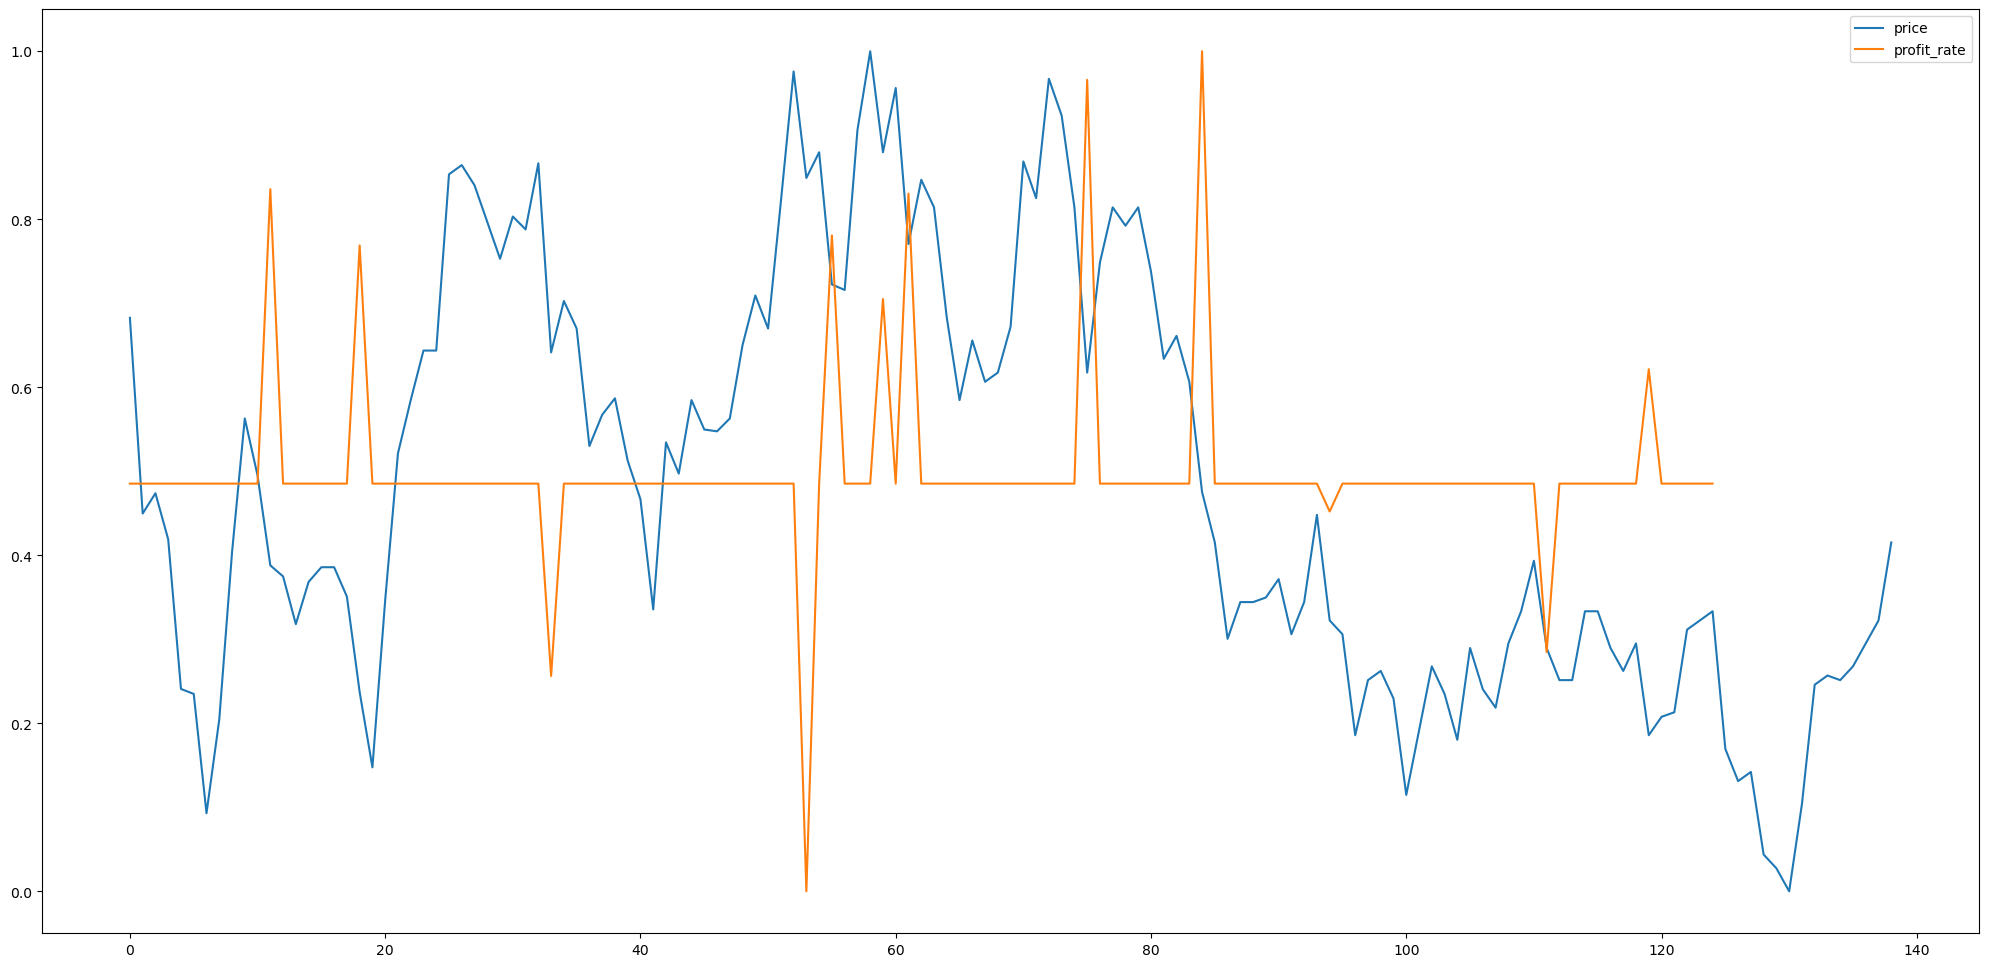

In [196]:
import numpy as np

plt.figure(figsize=(25,12))
plt.plot(norm(df['Adj_Close']).tolist(), label='price')
plt.plot(norm(np.array(daysProfit)/100), label='profit_rate')
plt.legend()